In [43]:
___Author___='LumberJack Jyss'

In [44]:
print('LumberJack BRUTAL AtidotCom TREND RULES\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND RULES
LumberJack Jyss (c)


In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df =  pd.read_csv('normalized.csv')
#df =  pd.read_csv('dataset_daily.csv')

In [47]:
df.set_index(df['Unnamed: 0'],drop=True,inplace=True)
df = df.iloc[:,1:]
df.head()

,eur/usd,gpb/usd,usd/jpy,tlt,vix,gold,Open_spy,High_spy,Low_spy,SPY
Unnamed: 0,,,,,,,,,,
2004-11-29,0.491816,0.701859,0.371005,0.314398,0.047892,0.163483,119.010002,117.480003,118.790001,117.809998
2004-11-30,0.490910,0.704955,0.369178,0.311918,0.047502,0.161879,118.239998,117.639999,118.000000,117.889999
2004-12-01,0.489303,0.708599,0.366602,0.309167,0.046384,0.162290,119.500000,118.099998,118.160004,119.230003
2004-12-02,0.488644,0.708997,0.368565,0.307793,0.046401,0.160689,119.870003,119.010002,119.099998,119.330002
2004-12-03,0.490370,0.707761,0.364245,0.311976,0.046240,0.162696,120.139999,119.089996,119.309998,119.250000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 2004-11-29 to 2019-03-01
Data columns (total 10 columns):
eur/usd     3149 non-null float64
gpb/usd     3149 non-null float64
usd/jpy     3149 non-null float64
tlt         3149 non-null float64
vix         3149 non-null float64
gold        3149 non-null float64
Open_spy    3149 non-null float64
High_spy    3149 non-null float64
Low_spy     3149 non-null float64
SPY         3149 non-null float64
dtypes: float64(10)
memory usage: 270.6+ KB


In [49]:
df.shape

(3149, 10)

In [50]:
df.shape[0]

3149

In [51]:
long_list = []
short_list = []
equity_list = []
var_long_list = []
var_short_list = []
candle_close = 0
candle_close_1 = 0
candle_close_2 = 0
candle_close_3 = 0
candle_close_4 = 0
candle_close_5 = 0
candle_open = 0
candle_high = 0
candle_low = 0
n=0
c = 0
cc = 0
long_target = 3
short_target = - 1

equity = 100000
print('Début de la boucle')

import sys
orig_stdout = sys.stdout
f = open('OUt_rules.txt', 'w')
sys.stdout = f


for i in range(5,df.shape[0]-1):
    print('\nCompteur de ligne :',i)
    print('Date :',df.index[i])
    c+=1
    
    candle_close = float(df.iloc[i,9])
    candle_close_1 = float(df.iloc[i-1,9])
    print('candle_close_1',candle_close_1)
    candle_close_2 = float(df.iloc[i-2,9])
    candle_close_3 = float(df.iloc[i-3,9])
    candle_close_4 = float(df.iloc[i-4,9])
    candle_close_5 = float(df.iloc[i-5,9])
    candle_open = float(df.iloc[i,6])
    candle_high = float(df.iloc[i,7])
    candle_low = float(df.iloc[i,8])
    
    var1 = candle_open - candle_close_1
    var2 = candle_open - candle_close_2
    var3 = candle_open - candle_close_3
    var4 = candle_open - candle_close_4
    var5 = candle_open - candle_close_5
    
    if var1 > long_target or var2 > long_target or\
    var3 > long_target or var4 > long_target or var5 > long_target:
        var_long_list.append(var1)
        var_long_list.append(var2)
        var_long_list.append(var3)
        var_long_list.append(var4)
        var_long_list.append(var5)
        print('\nDate :',df.index[i])
        print('Long effectué, :',var1,', ',var2,', ',var3,', ',var4)
        print('open actuel',float(df.iloc[i,6]))
        n = round(100000/candle_open)
        print('n ',n)
        print("les 4 close d'avant",\
              float(df.iloc[i-1,9]),float(df.iloc[i-2,9]),float(df.iloc[i-3,9]),\
              float(df.iloc[i-4,9]),float(df.iloc[i-5,9]))
        print('Max ',max(var_long_list))
        print('pnl :',max(var_long_list)*n)
        equity = equity -(n/100) + max(var_long_list)*n
        print('Nouvel equity :',equity)
        long_list.append(1)
        short_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_long_list = []
    
    elif var1< short_target or var2 < short_target or \
    var3 < short_target or var4 < short_target or var5 < short_target:
        var_short_list.append(var1)
        var_short_list.append(var2)
        var_short_list.append(var3)
        var_short_list.append(var4)
        var_short_list.append(var5)
        print('\nDate :',df.index[i])
        print('Short effectué :',var1,', ',var2,', ',var3,', ',var4)
        print('open actuel',float(df.iloc[i,6]))
        n = round(100000/candle_open)
        print('n ',n)
        print("les 4 close d'avant",\
              float(df.iloc[i-1,9]),float(df.iloc[i-2,9]),float(df.iloc[i-3,9]),\
              float(df.iloc[i-4,9]),float(df.iloc[i-5,9]))
        print('Min ',-min(var_short_list))
        print('pnl :', - min(var_short_list)*n)
        equity = equity -n/100 - min(var_short_list)*n
        print('Nouvel equity :',equity)
        short_list.append(1)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_short_list = []
    
    else :
        print('\nDate :',df.index[0])
        print('Il ne se passe rien')
        short_list.append(0)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print('La règle était 4 périodes consécutives au dessus de long ou au dessous de short')
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",equity-100000 )
    
f.close()
sys.stdout = orig_stdout


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print("La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)")
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000,2) )

var_dtf = pd.DataFrame()
var_dtf['Long'] = long_list
var_dtf['Short'] = short_list
var_dtf['Equity'] = equity_list

 
    

Début de la boucle
Boucle terminée
La long target était fixée à  3
La short target était fixée à  -1
La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)
Il y a eu  3149  périodes testées
Durant cette période, 1100  long et  771  short
Les gains totaux s'élèvent à : 5196795.48


In [52]:
sum(short_list)+sum(long_list), c, cc, len(short_list),len(long_list),len(equity_list),len(df)

(1871, 3143, 3143, 3143, 3143, 3143, 3149)

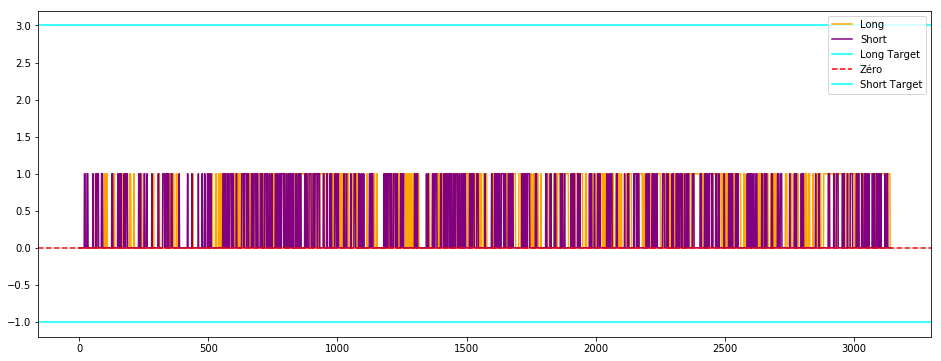

In [53]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Long'],color='orange',label='Long')
plt.plot(var_dtf['Short'],color='purple',label='Short')
plt.axhline(y=long_target, color='cyan',linestyle='-', label='Long Target')
plt.axhline(y=0, color='red',linestyle='--', label='Zéro')
plt.axhline(y=short_target,color='cyan',label='Short Target')
plt.legend()

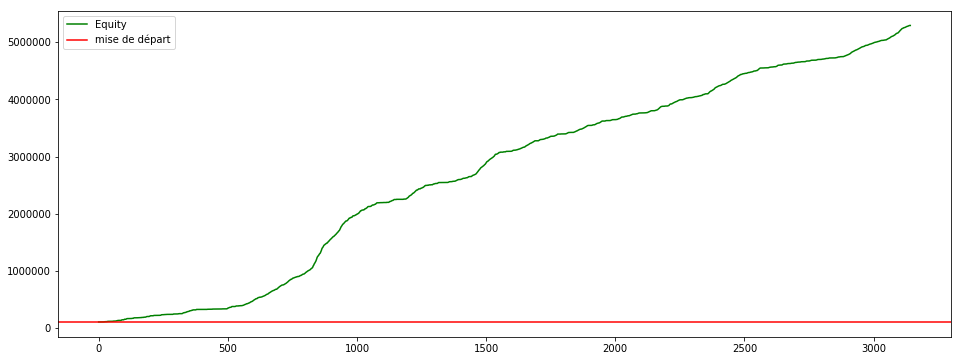

In [54]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [55]:
len(short_list),len(long_list),len(df)

(3143, 3143, 3149)

In [56]:
df = df.iloc[5:(df.shape[0]-1),:]
df['short'] = short_list
df['long'] = long_list

In [57]:
print('Nombre de positions de long trouvées :',sum(long_list))
print('Nombre de positions short trouvées :',sum(short_list))
print('Sur un total de ',sum(short_list)+sum(long_list))

Nombre de positions de long trouvées : 1100
Nombre de positions short trouvées : 771
Sur un total de  1871


In [58]:
print('Sur un achat systématique, les gains représentent',\
      round((sum(short_list)+sum(long_list))/(len(short_list)+len(long_list))*100,2),'%')

Sur un achat systématique, les gains représentent 29.76 %


In [59]:
#df['short'] = df['trend'].shift(-1)

In [60]:
df.tail()

,eur/usd,gpb/usd,usd/jpy,tlt,vix,gold,Open_spy,High_spy,Low_spy,SPY,short,long
Unnamed: 0,,,,,,,,,,,,
2019-02-22,0.445047,0.511793,0.392466,0.430973,0.047894,0.444905,279.359985,277.399994,278.109985,279.140015,0,1
2019-02-25,0.445218,0.512841,0.392557,0.429547,0.052626,0.444290,281.309998,279.429993,280.730011,279.519989,0,1
2019-02-26,0.445251,0.514240,0.391767,0.429742,0.053519,0.443042,280.299988,278.899994,279.130005,279.320007,0,0
2019-02-27,0.445709,0.518729,0.391295,0.426242,0.052028,0.441320,279.589996,277.480011,278.519989,279.200012,0,0
2019-02-28,0.446032,0.521976,0.391959,0.424338,0.052256,0.438374,279.450012,278.320007,278.959991,278.679993,0,0


In [61]:
df = df.dropna()
df.tail()

,eur/usd,gpb/usd,usd/jpy,tlt,vix,gold,Open_spy,High_spy,Low_spy,SPY,short,long
Unnamed: 0,,,,,,,,,,,,
2019-02-22,0.445047,0.511793,0.392466,0.430973,0.047894,0.444905,279.359985,277.399994,278.109985,279.140015,0,1
2019-02-25,0.445218,0.512841,0.392557,0.429547,0.052626,0.444290,281.309998,279.429993,280.730011,279.519989,0,1
2019-02-26,0.445251,0.514240,0.391767,0.429742,0.053519,0.443042,280.299988,278.899994,279.130005,279.320007,0,0
2019-02-27,0.445709,0.518729,0.391295,0.426242,0.052028,0.441320,279.589996,277.480011,278.519989,279.200012,0,0
2019-02-28,0.446032,0.521976,0.391959,0.424338,0.052256,0.438374,279.450012,278.320007,278.959991,278.679993,0,0


In [62]:
df['short'].sum(),df['long'].sum()

(771, 1100)

In [63]:
df.to_csv('dataset_ready_to_use.csv')